In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv('/content/drive/MyDrive/DS/lingSpam.csv')
data2 = pd.read_csv('/content/drive/MyDrive/DS/enronSpamSubset.csv')
data3 = pd.read_csv('/content/drive/MyDrive/DS/completeSpamAssassin.csv')

data1.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [4]:
data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

data2.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [5]:
data = pd.concat([data1,data2,data3],axis=0)
data.head()

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [6]:
data = data1
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2605 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    2605 non-null   object
 1   Label   2605 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.1+ KB


In [7]:
x = data["Body"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]

print(x_clnd_link[0])

Subject: great part-time or summer job !
 
 * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-888 

In [10]:
pattern = "[^a-zA-Z0-9]"


In [11]:
# This means replace all the chars that follow the pattern 
x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]


In [12]:
x_lowered = [text.lower() for text in x_cleaned]
print(x_lowered[0])

subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888 

In [13]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]


In [15]:
print(x_tokenized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'boxes', 'with', 'credit', 'applications', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'stores', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tells', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customers', 'hundreds', 'of', 'dollars', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'checks', 'yo

In [16]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [17]:
words = ["bats","removed","cheers","good","stopped","went","fired","cleaner","beers"]
for word in words:
    print(lemma.lemmatize(word),end=" ")

bat removed cheer good stopped went fired cleaner beer 

In [18]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]


In [19]:
print(x_lemmatized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'box', 'with', 'credit', 'application', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'store', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tell', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customer', 'hundred', 'of', 'dollar', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'check', 'your', 'com

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stopwords = nltk.corpus.stopwords.words("english")
x_prepared = [[word for word in text if word not in stopwords] for text in x_tokenized]

In [22]:
print(x_prepared[0])

['subject', 'great', 'part', 'time', 'summer', 'job', 'display', 'boxes', 'credit', 'applications', 'need', 'place', 'small', 'owner', 'operated', 'stores', 'area', '1', 'introduce', 'store', 'owner', 'manager', '2', 'use', '90', 'effective', 'script', 'tells', 'little', 'display', 'box', 'save', 'customers', 'hundreds', 'dollars', 'drawing', 'card', 'business', 'make', '5', '00', '15', '00', 'every', 'app', 'sent', '3', 'find', 'good', 'spot', 'counter', 'place', 'box', 'say', 'nothing', 'need', 'done', 'need', 'name', 'address', 'company', 'send', 'commission', 'checks', 'compensaation', '10', 'every', 'box', 'place', 'becoming', 'representative', 'could', 'also', 'earn', 'commission', '10', 'application', 'came', 'store', 'course', 'much', 'profitable', 'plan', 'pay', 'months', 'years', 'small', 'effort', 'call', '1', '888', '703', '5390', 'code', '3', '24', 'hours', 'receive', 'details', 'removed', 'mailing', 'list', 'type', 'b2998', 'hotmail', 'com', 'area', 'remove', 'subject', '

In [23]:
vectorizer = CountVectorizer(min_df=0.05)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()



In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(data["Label"]),random_state=42,test_size=0.2)
x_train.shape

(2084, 663)

In [25]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train[:10000])

MultinomialNB()

In [27]:
pred_labels = nb_model.predict(x_test)

In [30]:
accuracy_naive_bayes = accuracy_score(y_test[:1000], pred_labels) * 100
print('Accuracy (Naive Bayes): ', round(accuracy_naive_bayes, 4), "%")

Accuracy (Naive Bayes):  99.0403 %


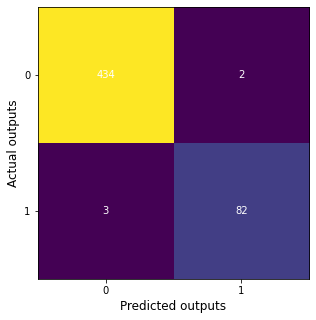

In [33]:
cm = confusion_matrix(y_test[:1000], pred_labels)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [34]:
specificity_naive_bayes = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (Naive Bayes): ', round(specificity_naive_bayes, 4), "%")

Specificity (Naive Bayes):  99.5413 %


In [35]:
sensitivity_naive_bayes = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (Naive Bayes): ', round(sensitivity_naive_bayes, 4), "%")

Sensitivity (Naive Bayes):  96.4706 %


In [36]:
print(classification_report(y_test[:1000], pred_labels))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.98      0.96      0.97        85

    accuracy                           0.99       521
   macro avg       0.98      0.98      0.98       521
weighted avg       0.99      0.99      0.99       521



In [40]:
y_prob = nb_model.predict_proba(x_test)

y_prob = y_prob[:, 1]

n_classes = len(nb_model.classes_)

fpr, tpr,_ = roc_curve(y_test[:1000], y_prob)
roc_auc = auc(fpr, tpr)

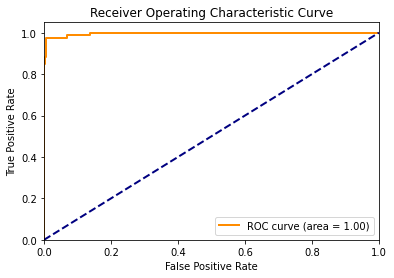

In [41]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train,y_train[:10000])

LinearDiscriminantAnalysis()

In [47]:
lda_pred_labels = lda_model.predict(x_test)


In [48]:
accuracy_lda = accuracy_score(y_test[:1000], lda_pred_labels ) * 100
print('Accuracy (LDA): ', round(accuracy_lda, 4), "%")

Accuracy (LDA):  92.3225 %


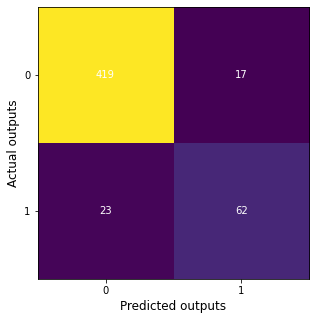

In [49]:
cm = confusion_matrix(y_test[:1000], lda_pred_labels)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [50]:
specificity_lda = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (LDA): ', round(specificity_lda, 4), "%")

Specificity (LDA):  96.1009 %


In [51]:
sensitivity_lda = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (LDA): ', round(sensitivity_lda, 4), "%")

Sensitivity (LDA):  72.9412 %


In [52]:
print(classification_report(y_test[:1000], lda_pred_labels))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       436
           1       0.78      0.73      0.76        85

    accuracy                           0.92       521
   macro avg       0.87      0.85      0.86       521
weighted avg       0.92      0.92      0.92       521



In [53]:
y_prob = lda_model.predict_proba(x_test)

y_prob = y_prob[:, 1]

n_classes = len(lda_model.classes_)

fpr, tpr,_ = roc_curve(y_test[:1000], y_prob)
roc_auc = auc(fpr, tpr)

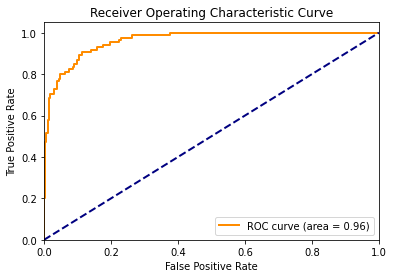

In [54]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()


**Conclusion:**
The Naive Bayes model outperformed LDA with accuracy of 99.0403 % on this dataset before dimensionality reduction. The accuracy of LDA came out to be 92.3225 %.
---

